<a href="https://colab.research.google.com/github/aaruma/Intelligent-Systems/blob/main/Arjen_Arumalingam_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# **Create 30,000 samples of x associated to y values**

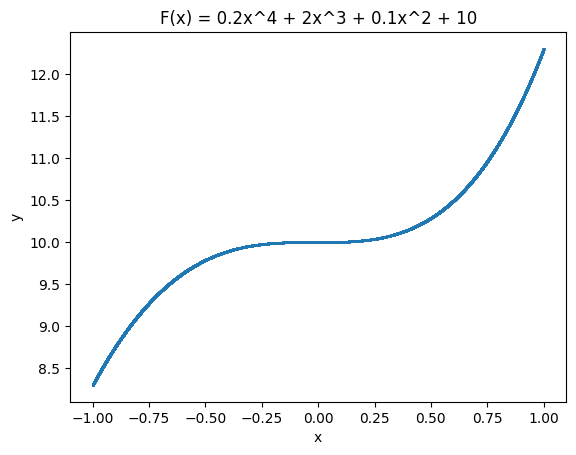

In [ ]:
# Q1
def generate_samples():
    np.random.seed(42)  # Setting a seed for consistent results and makes it easier to debug and compare different runs.

    # Generate 30,000 random samples for x between -1 and 1
    x = np.random.uniform(low=-1, high=1, size=(30000))

    # Calculate the corresponding y values using the given function
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

    return x, y

# Q2
def get_dataset(shuffle_data=True):
    x, y = generate_samples() # Generates Data for x and y

    if shuffle_data:
        # Shuffle the data
        indices = np.arange(len(x))
        np.random.shuffle(indices)
        x = x[indices]
        y = y[indices]
    return x, y

def shuffle_data(x, y):
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    return x[indices], y[indices]

x, y = get_dataset(shuffle_data=False)  # Data without shuffling

# Plot the function
plt.scatter(x, y, s=1, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('F(x) = 0.2x^4 + 2x^3 + 0.1x^2 + 10')
plt.show()

# **Function to split data into train, validation, and test sets**

In [ ]:
# Q3
def split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5):
    #  Assert True, False
    assert train_ratio + value_ratio + testing_ratio == 1.0, "Ratios should sum up to 1.0"
    assert len(x) == len(y), "Data arrays should have the same length"

    # Train, validation, and test sets
    data_length = len(x)
    train_size = int(train_ratio * data_length)
    value_size = int(value_ratio * data_length)

    train_x = x[:train_size]
    train_y = y[:train_size]

    val_x = x[train_size:train_size + value_size]
    val_y = y[train_size:train_size + value_size]

    test_x = x[train_size + value_size:]
    test_y = y[train_size + value_size:]

    return train_x, train_y, val_x, val_y, test_x, test_y


x, y = get_dataset(shuffle_data=True)
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Print the sizes of the split datasets
print("Train set size:", len(train_x))
print("Validation set size:", len(val_x))
print("Test set size:", len(test_x))


Train set size: 9000
Validation set size: 6000
Test set size: 15000


# **Calculate mean absolute error (MAE), mean square error(MSE), root mean square error (RMSE), and r2 score**

In [ ]:
#  Q4
# Using sklearn.metrics library
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return mae, mse, rmse, r2

# Actual target values
y_true = [1.2, 2.4, 3.6, 4.8, 6.0]

# Predicted values
y_pred = [1.0, 2.2, 3.8, 4.6, 5.8]

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_true, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))


Mean Absolute Error (MAE): 0.200
Mean Squared Error (MSE): 0.040
Root Mean Squared Error (RMSE): 0.200
R2 Score: 0.986


#**Using Keras Library for shuffled data**

## **Activation Function RELU (Case 1)**

Epoch 1/20
750/750 [==============================] - 19s 20ms/step - loss: 26.9486 - val_loss: 0.0953
Epoch 2/20
750/750 [==============================] - 9s 12ms/step - loss: 0.0550 - val_loss: 0.0370
Epoch 3/20
750/750 [==============================] - 11s 15ms/step - loss: 0.0341 - val_loss: 0.0301
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0232 - val_loss: 0.0133
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0071 - val_loss: 0.0038
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/20
750/750 [==============================] - 4s 5ms/step - loss: 8.9578e-04 - val_loss: 7.7706e-04
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 6.2721e-04 - val_loss: 5.4280e-04
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 4.9

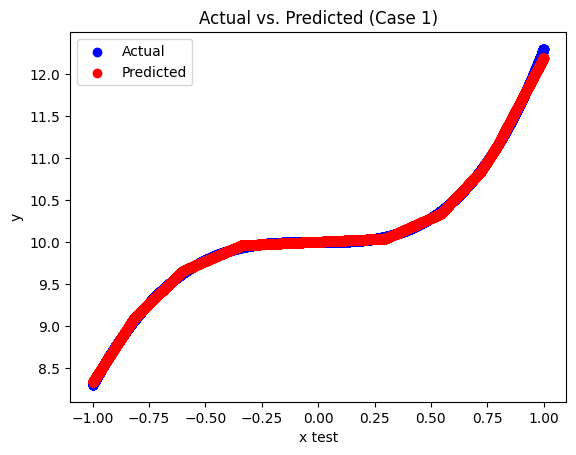

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 1)')
plt.legend()
plt.show()

## **Activation Function: Relu (Case 2)**

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 36.8908 - val_loss: 0.1336
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0654 - val_loss: 0.0540
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0508 - val_loss: 0.0448
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0442 - val_loss: 0.0410
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0405 - val_loss: 0.0366
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0339 - val_loss: 0.0271
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0219 - val_loss: 0.0150
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0114 - val_loss: 0.0076
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0058 - val_loss: 0.0041
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0034 - val_loss: 0.002

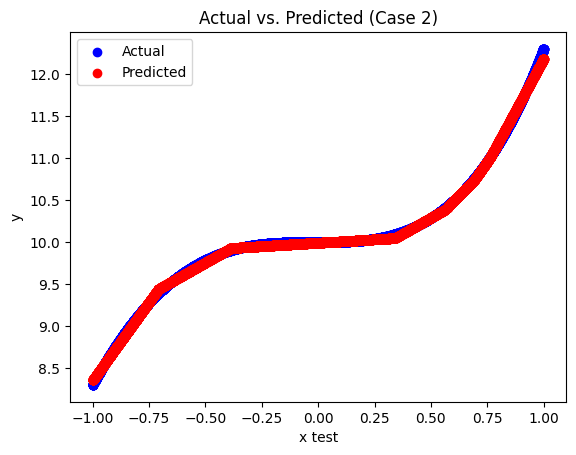

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 2)')
plt.legend()
plt.show()

## **Activation Function: Tanh (Case 3)**

Epoch 1/20
750/750 [==============================] - 5s 4ms/step - loss: 34.3385 - val_loss: 12.3776
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 6.0208 - val_loss: 2.2255
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.1518 - val_loss: 0.6599
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5874 - val_loss: 0.5603
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3987 - val_loss: 0.2700
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2340 - val_loss: 0.2053
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1821 - val_loss: 0.1655
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1506 - val_loss: 0.1325
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0812 - val_loss: 0.0404
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0254 - val_loss: 0.01

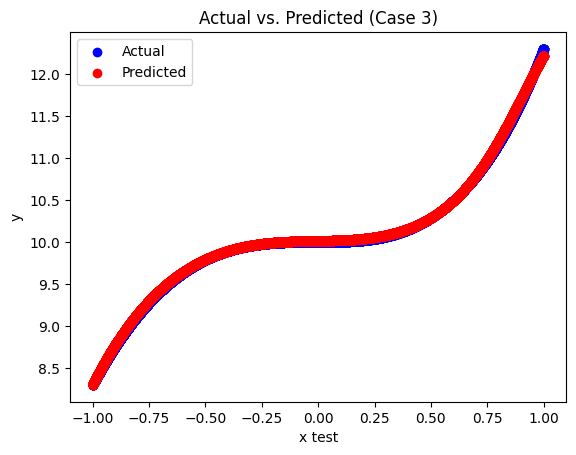

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 3)')
plt.legend()
plt.show()

## **Activation Function: Relu (Case 4)**

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0441 - val_loss: 0.0060
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0013 - val_loss: 7.4375e-04
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 5.6603e-04 - val_loss: 4.0415e-04
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 3.6074e-04 - val_loss: 3.4821e-04
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 3.1409e-04 - val_loss: 4.9445e-04
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 2.8467e-04 - val_loss: 2.3319e-04
Epoch 10/20
750/750 [==============================] - 2s 3ms/st

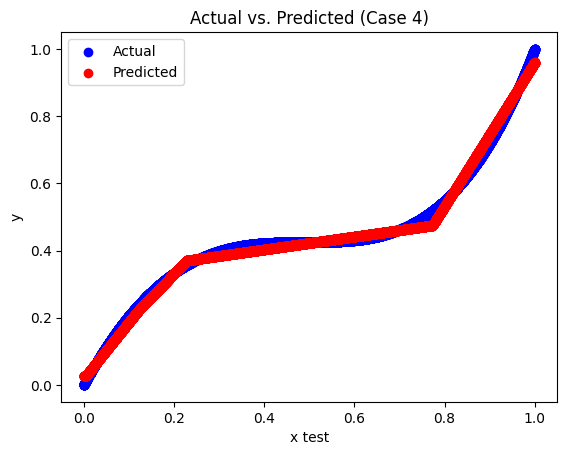

In [ ]:
# Using MinMaxScaler from sklearn.preprocessing

# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Shuffle data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, 1)).flatten()
val_x = scaler.transform(val_x.reshape(-1, 1)).flatten()
test_x = scaler.transform(test_x.reshape(-1, 1)).flatten()
train_y = scaler.fit_transform(train_y.reshape(-1, 1)).flatten()
val_y = scaler.transform(val_y.reshape(-1, 1)).flatten()
test_y = scaler.transform(test_y.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 4)')
plt.legend()
plt.show()

## **Activation Function: Tanh (Case 5)**

> Add blockquote



Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0092 - val_loss: 0.0071
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0071 - val_loss: 0.0078
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 10/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0060 - val_loss: 0.0056

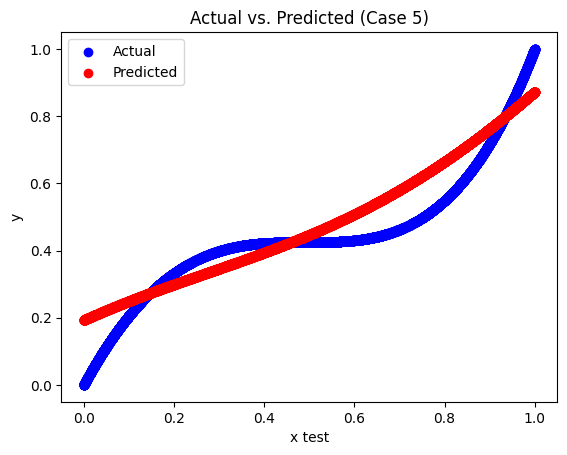

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Shuffle the data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, 1)).flatten()
val_x = scaler.transform(val_x.reshape(-1, 1)).flatten()
test_x = scaler.transform(test_x.reshape(-1, 1)).flatten()
train_y = scaler.fit_transform(train_y.reshape(-1, 1)).flatten()
val_y = scaler.transform(val_y.reshape(-1, 1)).flatten()
test_y = scaler.transform(test_y.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 5)')
plt.legend()
plt.show()

[link text](https://)# **Using Keras Library for Unshuffled Data Set:**

##**Activation Function RELU (Case 1)**

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 19.1727 - val_loss: 0.2376
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0951 - val_loss: 0.0301
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0165 - val_loss: 0.0094
Epoch 4/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0068 - val_loss: 0.0056
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0029 - val_loss: 0.002

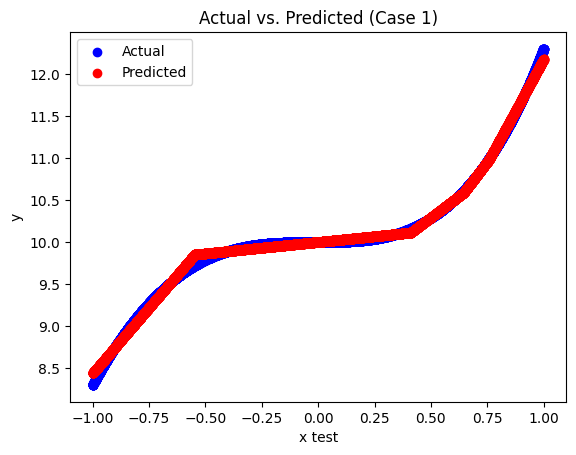

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 1)')
plt.legend()
plt.show()

## **Activation Function: Relu (Case 2)**

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 39.6316 - val_loss: 0.2710
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0861 - val_loss: 0.0677
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0596 - val_loss: 0.0534
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0490 - val_loss: 0.0460
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0447 - val_loss: 0.0434
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0421 - val_loss: 0.0418
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0365 - val_loss: 0.0316
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0259 - val_loss: 0.0200
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0155 - val_loss: 0.0118
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.007

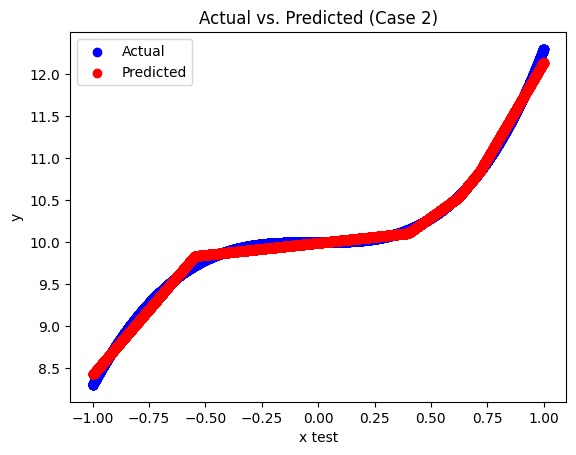

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 2)')
plt.legend()
plt.show()

## **Activation Function: Tanh (Case 3)**

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 41.7190 - val_loss: 17.6723
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 9.0987 - val_loss: 3.7474
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.8096 - val_loss: 0.8675
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.6485 - val_loss: 0.5908
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5459 - val_loss: 0.3673
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2674 - val_loss: 0.2222
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1873 - val_loss: 0.1721
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1476 - val_loss: 0.1272
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0844 - val_loss: 0.0538
Epoch 10/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0310 - val_loss: 0.02

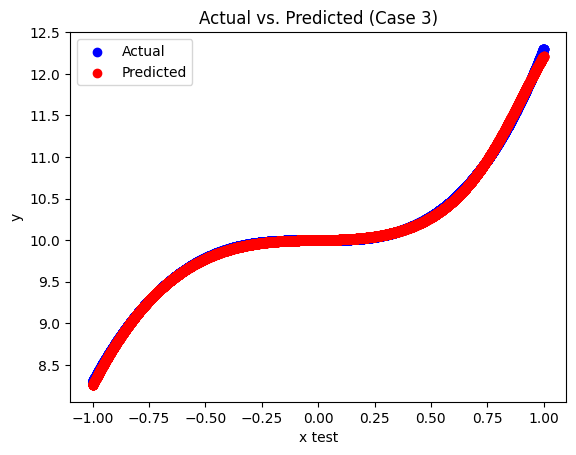

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 3)')
plt.legend()
plt.show()

## **Activation Function: Relu (Case 4)**

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 4/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0012 - val_loss: 5.0657e-04
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 3.1398e-04 - val_loss: 2.2013e-04
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 2.2232e-04 - val_loss: 2.3215e-04
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 2.3829e-04 - val_loss: 1.9020e-04
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 2.2503e-04 - val_loss: 1.9462e-04
Epoch 9/20
750/750 [==============================] - 3s 3ms/step - loss: 2.2910e-04 - val_loss: 2.6418e-04
Epoch 10/20
750/750 [==============================] - 3

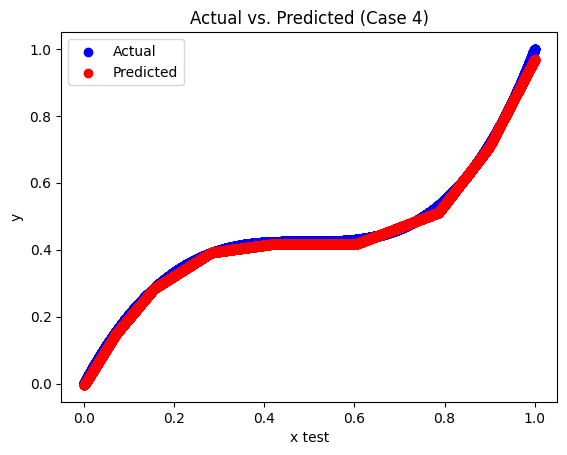

In [ ]:
# Using MinMaxScaler from sklearn.preprocessing

# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Shuffle data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, 1)).flatten()
val_x = scaler.transform(val_x.reshape(-1, 1)).flatten()
test_x = scaler.transform(test_x.reshape(-1, 1)).flatten()
train_y = scaler.fit_transform(train_y.reshape(-1, 1)).flatten()
val_y = scaler.transform(val_y.reshape(-1, 1)).flatten()
test_y = scaler.transform(test_y.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 4)')
plt.legend()
plt.show()

## **Activation Function: Tanh (Case 5)**

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0116 - val_loss: 0.0076
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0072 - val_loss: 0.0069
Epoch 3/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0075
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0052 - val_loss: 0.0045
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0021 - val_loss: 2.5899e-04
Epoch 8/20
750/750 [==============================] - 3s 3ms/step - loss: 5.3665e-05 - val_loss: 1.3881e-05
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 1.6163e-05 - val_loss: 1.2498e-05
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 1.656

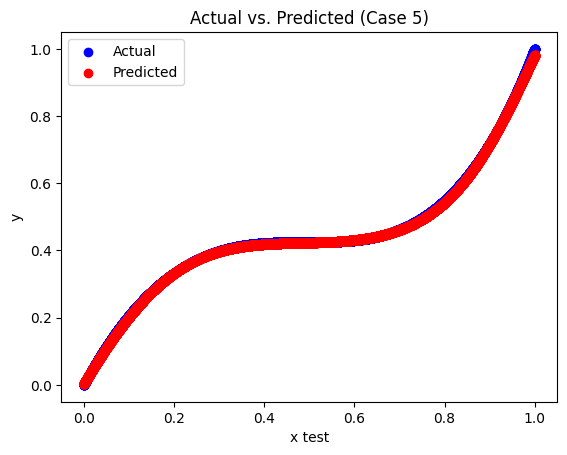

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Shuffle the data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, 1)).flatten()
val_x = scaler.transform(val_x.reshape(-1, 1)).flatten()
test_x = scaler.transform(test_x.reshape(-1, 1)).flatten()
train_y = scaler.fit_transform(train_y.reshape(-1, 1)).flatten()
val_y = scaler.transform(val_y.reshape(-1, 1)).flatten()
test_y = scaler.transform(test_y.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 5)')
plt.legend()
plt.show()

# **Solve the XOR problem by using a neural network**

In [ ]:
# Q6
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Define the model architecture
input_dim = 2
hidden_dim = 2
output_dim = 1
model = Sequential([
    Dense(hidden_dim, activation='relu', input_shape=(input_dim,)),
    Dense(output_dim, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=5000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f'Accuracy: {accuracy}')

# Predict the output for new inputs
new_X = np.array([[0,0],[0,1],[1,0],[1,1]])
predictions = model.predict(new_X)
print(predictions)


Accuracy: 0.75
1/1 [==============================] - 0s 88ms/step
[[0.33505556]
 [0.33505556]
 [0.9948348 ]
 [0.33505556]]
